# World Happiness Report Analysis

This project performs Exploratory Data Analysis (EDA) on the happiness rate of countries based on attributes such as happiness score, social support, GDP per capita, family, life expectancy, perceptions of corruption, etc. and analyzes the effect of COVID-19 on the individual attributes as well as the overall happiness of countries.

#### Attributes/Variables involved in the analysis:

* **Healthy life expectancy**: Health life expectancy represents the average number of years that a person can expect to live in "full health" by taking into account years lived in less than full health due to disease and/or injury.([Source](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/66#:~:text=Definition%3A,to%20disease%20and%2For%20injury.))<br><br>

* **Social support**: Social support is the perception and actuality that one is cared for, has assistance available from other people, and most popularly, that one is part of a supportive social network. These supportive resources can be emotional, informational, or companionship; tangible or intangible.([Source](https://en.wikipedia.org/wiki/Social_support))<br><br>

* **Freedom to make life choices**: Freedom to make life choices describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.([Source](https://en.wikipedia.org/wiki/Freedom_of_choice))<br><br>

* **GDP per capita**: GDP per capita is a measure of a country's economic output that accounts for its number of people.([Source](https://www.thebalancemoney.com/gdp-per-capita-formula-u-s-compared-to-highest-and-lowest-3305848))<br><br>

* **Generosity**: Generosity is the quality of being voluntary and unselfish when giving time, money, attention, or other resources.<br><br>

* **Perceptions of corruption**: The Corruption Perceptions Index (CPI) is an index published annually by Transparency International since 1995 which ranks countries by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys.([Source](https://www.transparency.org/en/news/how-cpi-scores-are-calculated))

#### Importing modules 

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#### Importing world happiness report 2019 dataset

In [248]:
df = pd.read_csv("2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [249]:
df.shape

(156, 9)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 10.4+ KB


In [251]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [252]:
df.duplicated().sum()

0

The data has no duplicates.

In [253]:
# Finding missing values in the dataset
df.isnull().sum() 

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

The data has no missing values.

In [254]:
# Finding the attribute that contributes the most to the happiness score
datadict = {
  "GDP per capita": df['GDP per capita'].mean(),
  "Social support": df['Social support'].mean(),
  "Healthy life expectancy": df['Healthy life expectancy'].mean(),
  "Freedom to make life choices": df['Freedom to make life choices'].mean(),
  "Perceptions of corruption": df['Perceptions of corruption'].mean()
}

v = list(datadict.values())
k = list(datadict.keys())
print(str(k[v.index(max(v))]) + ', ' + str((max(v))))

Social support, 1.2088141025641026


This shows that on average, the social support attribute contributes most to the happiness of a country. It means the more supportive people are, the happier the country is.<br><br>
Note that this may not be true for countries individually (i.e., on an individual level, other attributes might contribute more to the country's happiness. This calculation is done generally, taking average scores).

In [255]:
# Highlighting maximum values in each column
df.style.highlight_max(color = 'lightgreen', axis = 0)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769000,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000
1,2,Denmark,7.600000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000
2,3,Norway,7.554000,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000
3,4,Iceland,7.494000,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000
4,5,Netherlands,7.488000,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000
5,6,Switzerland,7.480000,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000
6,7,Sweden,7.343000,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000
7,8,New Zealand,7.307000,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000
8,9,Canada,7.278000,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000
9,10,Austria,7.246000,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000


In [256]:
# Displaying the top 25 happiest countries in the world
happiest = df.head(25)
fig = go.Figure(data=[go.Table(
    header=dict(values=['Country or region'], align='center'),
    cells=dict(values=[happiest['Country or region'].values], align='center'))])

fig.update_layout(height=800, width=700, title_text="Top 25 Happiest Countries in the World")
fig.show()

We can see that Finland is the Happiest country in the world because of high social support, freedom to make life choices, and low levels of corruption.

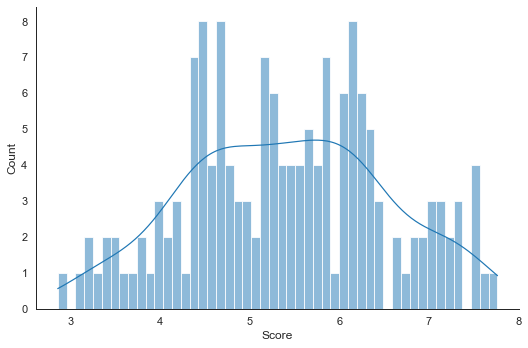

In [257]:
# Checking the distribution of the score
sns.set_style('white')
sns.set_context("paper", font_scale = 1.25)
sns.displot(data=df, x="Score", kind="hist", bins = 50, aspect = 1.5, kde=True)

In [258]:
# Comparing scores of selected countries
d = df[(df['Country or region'].isin(['India','Canada','United Kingdom', 'United States', 'Kuwait', 'Japan']))]
d

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128
50,51,Kuwait,6.021,1.500,1.319,0.808,0.493,0.142,0.097
57,58,Japan,5.886,1.327,1.419,1.088,0.445,0.069,0.140
139,140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085


Among these four countries, Canada has the highest happiness score.

#### Calculating the correlation between attributes

In [259]:
df.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


<AxesSubplot:>

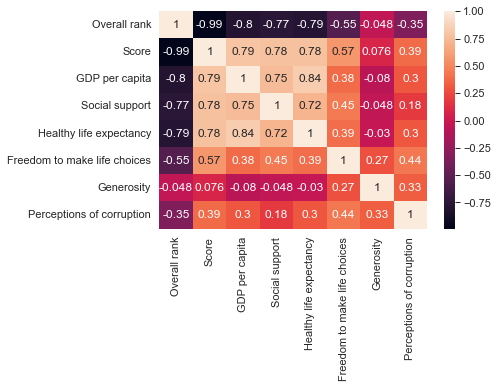

In [260]:
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Country or region'>

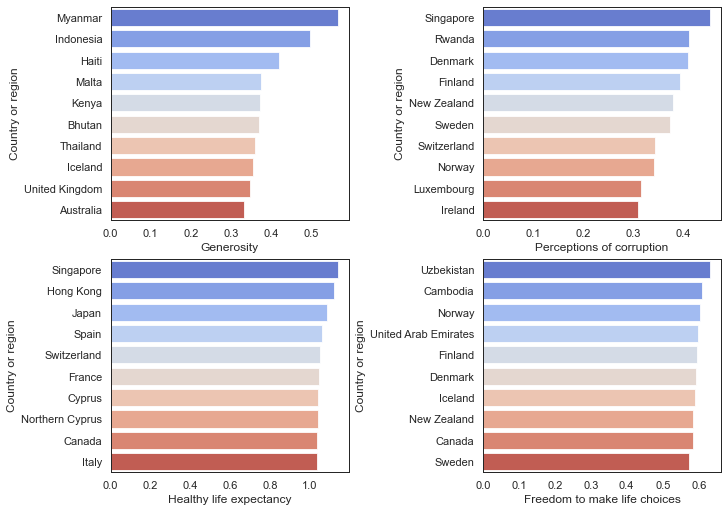

In [261]:
# Visualizing results for top 10 countries that are most generous and have most perceptions of corruption
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(10,7))

sns.barplot(x='Generosity' ,y='Country or region',data=df.nlargest(10,'Generosity'),ax=axes[0][0],palette='coolwarm')
sns.barplot(x='Perceptions of corruption' ,y='Country or region',data=df.nlargest(10,'Perceptions of corruption'),ax=axes[0][1],palette='coolwarm')
sns.barplot(x='Healthy life expectancy' ,y='Country or region',data=df.nlargest(10,'Healthy life expectancy'),ax=axes[1][0],palette='coolwarm')
sns.barplot(x='Freedom to make life choices' ,y='Country or region',data=df.nlargest(10,'Freedom to make life choices'),ax=axes[1][1],palette='coolwarm')

#### Importing world happiness report datasets 2015-2022 to observe how happiness is changed over the years

In [262]:
df15 = pd.read_csv("2015.csv")
df15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [263]:
df16 = pd.read_csv("2016.csv")
df16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [264]:
df17 = pd.read_csv("2017.csv")
df17.head()

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [265]:
df18 = pd.read_csv("2018.csv")
df18.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [266]:
df20 = pd.read_csv("2020.csv")
df20.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [267]:
df21 = pd.read_csv("2021.csv")
df21.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [268]:
df22 = pd.read_csv("2022.csv")

# Cleaning the dataset to make it easier for comparison with other datasets
df22['Happiness score'] = df22['Happiness score']/1000
df22['Whisker-high'] = df22['Whisker-high']/1000
df22['Whisker-low'] = df22['Whisker-low']/1000
df22['Dystopia Residual'] = df22['Dystopia Residual']/1000
df22['GDP per capita'] = df22['GDP per capita']/1000
df22['Social support'] = df22['Social support']/1000
df22['Freedom to make life choices'] = df22['Freedom to make life choices']/1000
df22['Healthy life expectancy'] = df22['Healthy life expectancy']/1000
df22['Generosity'] = df22['Generosity']/1000
df22['Perceptions of corruption'] = df22['Perceptions of corruption']/1000
df22.style.highlight_max(color = 'lightgreen', axis = 0)

,Rank,Country,Happiness score,Whisker-high,Whisker-low,Dystopia Residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.821000,7.886000,7.756000,2.518000,1.892000,1.258000,0.775000,0.736000,0.109000,0.534000
1,2,Denmark,7.636000,7.710000,7.563000,2.226000,1.953000,1.243000,0.777000,0.719000,0.188000,0.532000
2,3,Iceland,7.557000,7.651000,7.464000,2.320000,1.936000,1.320000,0.803000,0.718000,0.270000,0.191000
3,4,Switzerland,7.512000,7.586000,7.437000,2.153000,2.026000,1.226000,0.822000,0.677000,0.147000,0.461000
4,5,Netherlands,7.415000,7.471000,7.359000,2.137000,1.945000,1.206000,0.787000,0.651000,0.271000,0.419000
5,6,Luxembourg*,7.404000,7.501000,7.307000,2.042000,2.209000,1.155000,0.790000,0.700000,0.120000,0.388000
6,7,Sweden,7.384000,7.454000,7.315000,2.003000,1.920000,1.204000,0.803000,0.724000,0.218000,0.512000
7,8,Norway,7.365000,7.440000,7.290000,1.925000,1.997000,1.239000,0.786000,0.728000,0.217000,0.474000
8,9,Israel,7.364000,7.426000,7.301000,2.634000,1.826000,1.221000,0.818000,0.568000,0.155000,0.143000
9,10,New Zealand,7.200000,7.279000,7.120000,1.954000,1.852000,1.235000,0.752000,0.680000,0.245000,0.483000


#### Visualizing world happiness score in 2022

In [269]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df22['Country'], 
    z = df22['Happiness score'].astype(float),
    locationmode = 'country names',
    colorscale = 'RdYlGn',
    colorbar_title = "Happiness Score",
))

fig.update_layout(
    title_text = 'Global Visualization of Happiness 2022',
)

fig.show()

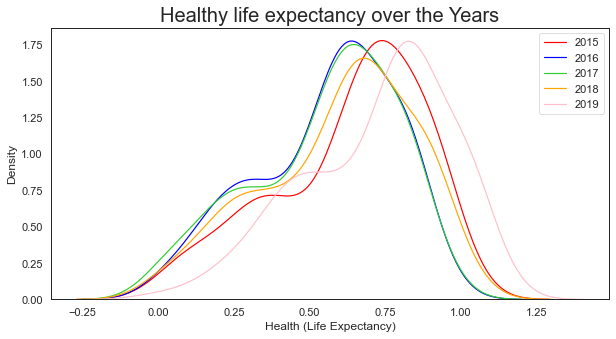

In [270]:
# Observing the change in healthy life expectancy over the years
plt.figure(figsize=(10,5))
sns.kdeplot(df15['Health (Life Expectancy)'],color='red', label = '2015')
sns.kdeplot(df16['Health (Life Expectancy)'],color='blue', label = '2016')
sns.kdeplot(df17['Health (Life Expectancy)'],color='limegreen', label = '2017')
sns.kdeplot(df18['Healthy life expectancy'],color='orange', label = '2018')
sns.kdeplot(df['Healthy life expectancy'],color='pink', label = '2019')
plt.title('Healthy life expectancy over the Years',size=20)
plt.legend()
plt.show()

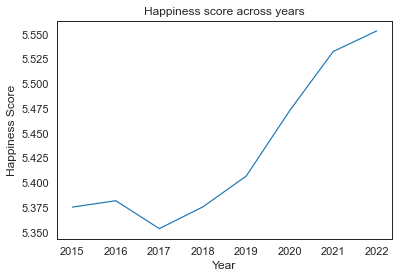

In [271]:
# Observing the change in the world happiness score over the years
y_axis = [df15['Happiness Score'].mean(), df16['Happiness Score'].mean(), df17['Happiness Score'].mean(), df18['Score'].mean(), 
          df['Score'].mean(), df20['Ladder score'].mean(), df21['Ladder score'].mean(), df22['Happiness score'].mean()]
x_axis = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

plt.plot(x_axis, y_axis)
plt.title('Happiness score across years')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.show()

## Analyzing the effect of COVID-19 on world happiness

In [272]:
# Importing Covid-19 dataset
covid_dataset = pd.read_csv("covid19_Confirmed_dataset.csv")
covid_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [273]:
# Dropping unnecessary columns
covid_dataset.drop(['Lat', 'Long'], axis=1, inplace = True)
covid_dataset

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [274]:
# Aggregating the rows by country
covid_dataset_aggregated = covid_dataset.groupby("Country/Region").sum()
covid_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [275]:
covid_dataset_aggregated.shape

(187, 100)

In [276]:
# Finding maximum infection rate of all countries
countries = list(covid_dataset_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(covid_dataset_aggregated.loc[c].diff().max())
max_infection_rates
covid_dataset_aggregated["Max_Infection_Rates"] = max_infection_rates

In [277]:
covid_data = pd.DataFrame(covid_dataset_aggregated['Max_Infection_Rates'])
covid_data['Max_Infection_Rates'] = covid_data['Max_Infection_Rates']/100
covid_data.head()

,Max_Infection_Rates
Country/Region,
Afghanistan,2.32
Albania,0.34
Algeria,1.99
Andorra,0.43
Angola,0.05


In [278]:
covid_data.shape

(187, 1)

In [279]:
happiness_report = pd.read_csv('2019.csv')
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [280]:
# Dropping unnecessary columns
useless_columns = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']

In [281]:
happiness_report.drop(useless_columns, axis=1, inplace=True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [282]:
# Changing indices to country/region
happiness_report.set_index('Country or region', inplace=True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [283]:
happiness_report.shape

(156, 4)

#### Joining the datasets

In [284]:
data = covid_data.join(happiness_report, how='inner')
data.head()

,Max_Infection_Rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,2.32,0.350,0.517,0.361,0.000
Albania,0.34,0.947,0.848,0.874,0.383
Algeria,1.99,1.002,1.160,0.785,0.086
Argentina,2.91,1.092,1.432,0.881,0.471
Armenia,1.34,0.850,1.055,0.815,0.283


In [285]:
data.shape

(143, 5)

In [286]:
data.sample(5)

,Max_Infection_Rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Uganda,0.11,0.332,1.069,0.443,0.356
Nicaragua,0.02,0.694,1.325,0.835,0.435
Paraguay,0.27,0.855,1.475,0.777,0.514
Senegal,0.87,0.450,1.134,0.571,0.292
India,18.93,0.755,0.765,0.588,0.498


#### Analyzing the correlation between attributes

In [287]:
data.corr()

,Max_Infection_Rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_Infection_Rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


<AxesSubplot:>

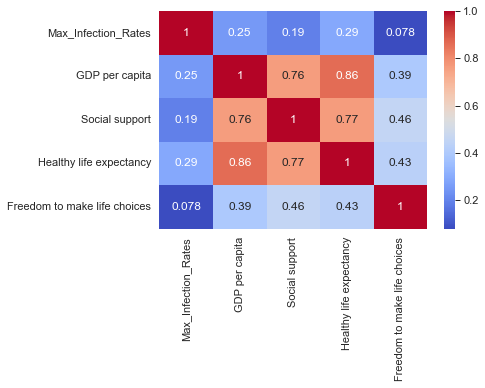

In [288]:
sns.heatmap(data.corr(), annot = True, cmap= 'coolwarm')

#### Plotting GDP per capita vs Healthy life expectancy

C:\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='GDP per capita', ylabel='Healthy life expectancy'>

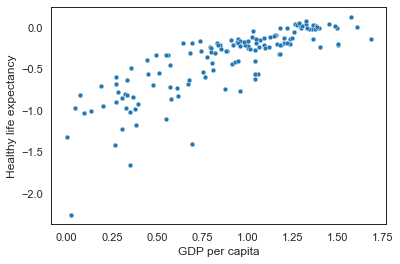

In [289]:
x = data['GDP per capita']
y = data['Healthy life expectancy']
sns.scatterplot(x, np.log(y))

C:\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='GDP per capita', ylabel='Healthy life expectancy'>

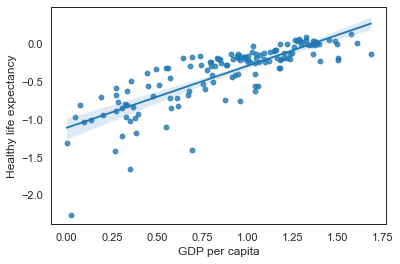

In [290]:
sns.regplot(x, np.log(y))

#### Plotting Max Infection Rates vs Healthy life expectancy

<AxesSubplot:xlabel='Max_Infection_Rates', ylabel='Healthy life expectancy'>

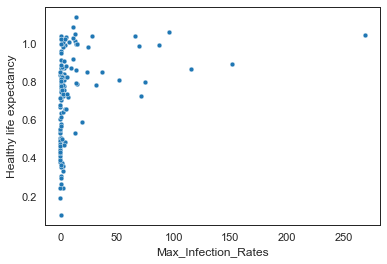

In [291]:
x = data['Max_Infection_Rates']
y = data['Healthy life expectancy']
sns.scatterplot(data=data, x=x, y=y)

C:\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Max_Infection_Rates', ylabel='Healthy life expectancy'>

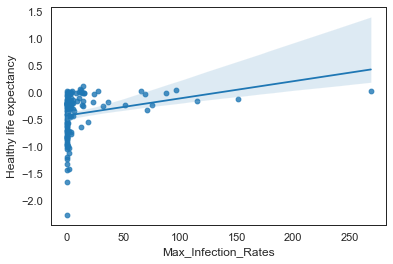

In [292]:
sns.regplot(x, np.log(y))

### Key takeaways:

* Social support and GDP per capita contribute the most to world happiness.
* Health being one of the primary concerns for an individual residing in a country, is changing over the years.
* The average happiness score dropped in 2017, but is getting better over the years.
* There is very less correlation between Covid-19 infection rate and other attributes.
* There is a significant correlation between healthy life expectancy and GDP per capita.